#            CASE STUDY: CUSTOMER ANALYSIS FOR RETAIL

### Importing required Packages

In [1011]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Importing all data

In [1012]:
url = "C:\\Users\gouthaman\Desktop\FullStack_AI\Data Science Using Python\Case Study 1 - Retail Case Study\\"

customer = pd.read_csv(url+ "Customer.csv")
prod_cat_info = pd.read_csv(url+"prod_cat_info.csv")
transactions = pd.read_csv(url+"Transactions.csv")


### Analysing structure of the Data

In [1013]:
customer.shape

(5647, 4)

In [1014]:
customer.dropna(inplace=True)
customer.shape

(5643, 4)

In [1015]:
prod_cat_info.shape

(23, 4)

In [1016]:
prod_cat_info.isna().sum()

prod_cat_code        0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [1017]:
transactions.shape

(23053, 10)

In [1018]:
transactions.isna().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
dtype: int64

In [1019]:
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [1020]:
prod_cat_info.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [1021]:
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [1022]:
transactions.rename(columns ={'prod_subcat_code' : 'prod_sub_cat_code'},inplace=True )
transactions.head(2)

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


In [1023]:
trans_prod =pd.merge(left = transactions,right = prod_cat_info, on =['prod_cat_code','prod_sub_cat_code'], how='left', )

In [1024]:
trans_prod.shape

(23053, 12)

In [1025]:
Customer_Final = pd.merge(left = customer, right = trans_prod, left_on = 'customer_Id',right_on='cust_id', how= 'inner')

In [1026]:
Customer_Final.shape

(23036, 16)

In [1027]:
customer.shape

(5643, 4)

In [470]:
Customer_Final.to_csv("C:\\Users\gouthaman\Desktop\FullStack_AI\Data Science Using Python\Case Study 1 - Retail Case Study\\fulldata1.csv")

In [1028]:
Customer_Final.drop(labels="cust_id",axis=1,inplace=True) #droping Cust_id as the column is repeating


In [1029]:
Customer_Final.shape

(23036, 15)

 ### Converting date type variable to DateTime Variable

In [1030]:
Customer_Final.DOB= pd.to_datetime(Customer_Final.DOB)
Customer_Final.tran_date =pd.to_datetime(Customer_Final.tran_date)


In [1031]:
Customer_Final.drop_duplicates(inplace=True) #no duplicates

In [1032]:
Customer_Final.shape

(23023, 15)

### 2. Prepare a summary report for the merged data set.
a. Get the column names and their corresponding data types

In [1033]:
Customer_Final.dtypes

customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
transaction_id                int64
tran_date            datetime64[ns]
prod_sub_cat_code             int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
prod_cat                     object
prod_subcat                  object
dtype: object

b. Top/Bottom 10 observations

In [1035]:
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
23026,270476,1992-12-25,F,3.0,78034405353,2013-08-13,11,6,1,971,101.955,1072.955,TeleShop,Home and kitchen,Bath
23027,270476,1992-12-25,F,3.0,3359888057,2013-03-16,10,3,4,361,151.620,1595.620,MBR,Electronics,Audio and video
23028,270476,1992-12-25,F,3.0,22883386455,2012-05-22,4,2,4,898,377.160,3969.160,Flagship store,Footwear,Kids
23029,270476,1992-12-25,F,3.0,19725194268,2012-02-21,4,4,4,618,259.560,2731.560,e-Shop,Bags,Women
23030,270476,1992-12-25,F,3.0,85475160771,2011-09-08,5,3,5,1354,710.850,7480.850,Flagship store,Electronics,Computers
23031,269626,1992-12-27,F,5.0,71369029396,2011-10-18,12,6,1,638,66.990,704.990,e-Shop,Home and kitchen,Tools
23032,269626,1992-12-27,F,5.0,94134051896,2011-07-07,3,1,3,1078,339.570,3573.570,MBR,Clothing,Kids
23033,274308,1992-12-29,F,5.0,26208690928,2012-10-22,1,2,2,898,188.580,1984.580,MBR,Footwear,Mens
23034,274308,1992-12-29,F,5.0,57358822237,2012-05-09,1,2,4,876,367.920,3871.920,e-Shop,Footwear,Mens
23035,274308,1992-12-29,F,5.0,58160544337,2012-04-07,12,5,5,588,308.700,3248.700,e-Shop,Books,Academic


### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [1005]:
# seperating continous variable and categorical variables
cat_var = ['Gender',"city_code","prod_cat_code",'prod_sub_cat_code','Store_type','prod_cat','prod_subcat']
continous_var = ['Qty','Rate','Tax','total_amt']

In [1006]:
Customer_Final[continous_var].describe()

,Qty,Rate,Tax,total_amt
count,23023.000000,23023.000000,23023.000000,23023.000000
mean,2.435868,637.116840,248.701263,2109.881471
std,2.264415,621.870539,187.196950,2505.929444
min,-5.000000,-1499.000000,7.350000,-8270.925000
25%,1.000000,312.000000,98.280000,762.450000
50%,3.000000,710.000000,199.080000,1756.950000
75%,4.000000,1110.000000,365.820000,3570.255000
max,5.000000,1500.000000,787.500000,8287.500000


### d. Frequency tables for all the categorical variables

In [1007]:
def cat_var_summary( x ):
    mode = x.value_counts().sort_values(ascending=False).reset_index()

    return pd.Series([x.count(),x.nunique(),x.max(),mode.iloc[0,1],x.isnull().sum() ] ,index=['Count','nunique','Top','frequency',"Missing"])

In [1008]:
Customer_Final[cat].apply(cat_var_summary)

,Gender,city_code,prod_cat_code,prod_sub_cat_code,Store_type,prod_cat,prod_subcat
Count,23023,23023.0,23023,23023,23023,23023,23023
nunique,2,10.0,6,12,4,6,18
Top,M,10.0,6,12,e-Shop,Home and kitchen,Women
frequency,11798,2422.0,6061,3999,9299,6061,3044
Missing,0,0.0,0,0,0,0,0


## 3) Generate histograms for all continuous variables and frequency bars for categorical variables

In [1009]:
def histplot(colname):
    count,bin_edges = np.histogram(Customer_Final[colname],10)
    Customer_Final[colname].plot(kind="hist",xticks=bin_edges)
    plt.xlabel(colname)
    plt.ylabel("Count")
    name = "Histogram of "+colname
    plt.title(name)
    plt.show()

Histogram for Continuous Variables


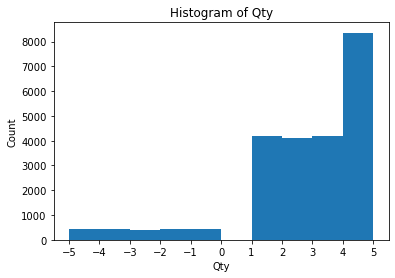

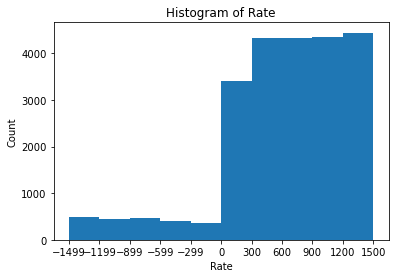

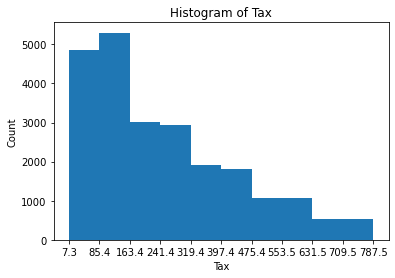

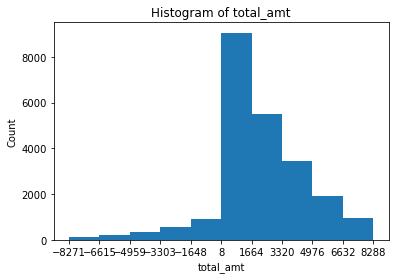

In [1010]:
print("Histogram for Continuous Variables")
for i in continuous_var:
    histplot(i)

In [999]:
def freqbarplot(columnname):
    plt.figure(figsize=(8,8))
    Customer_Final[columnname].value_counts().sort_index().plot(kind='bar')
    plt.xlabel(columnname)
    plt.ylabel("count")
    title=columnname+" - Freq Plot"
    plt.title(title)
    plt.show()

Frequency plot for Categorical Variable


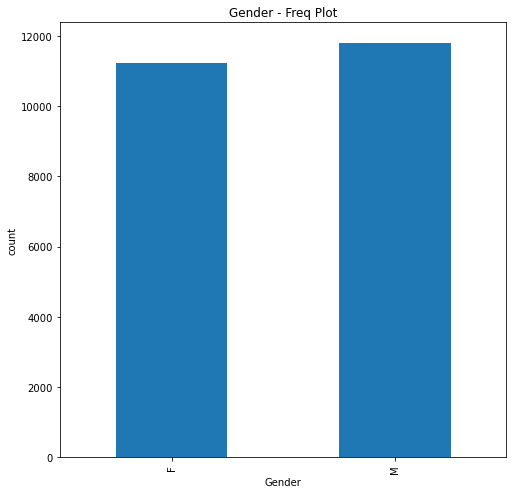

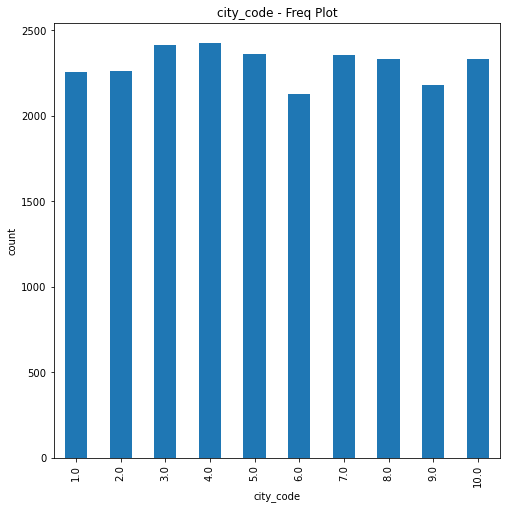

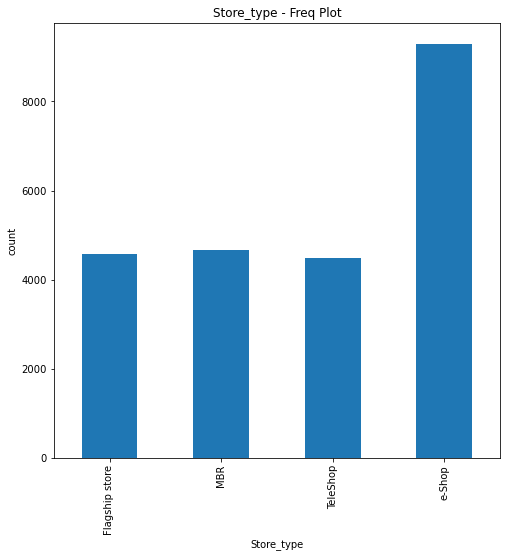

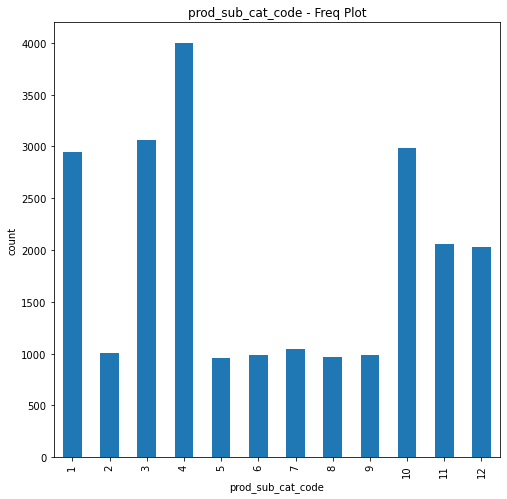

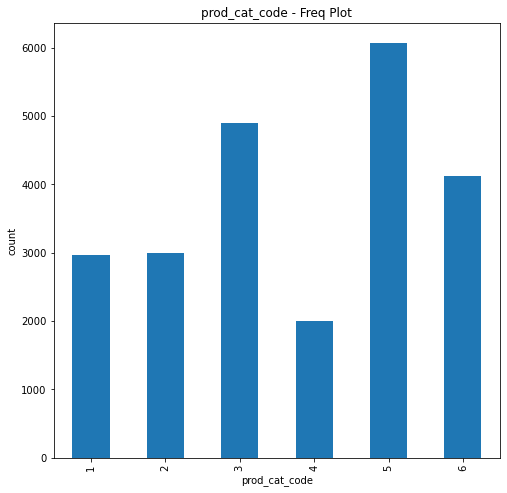

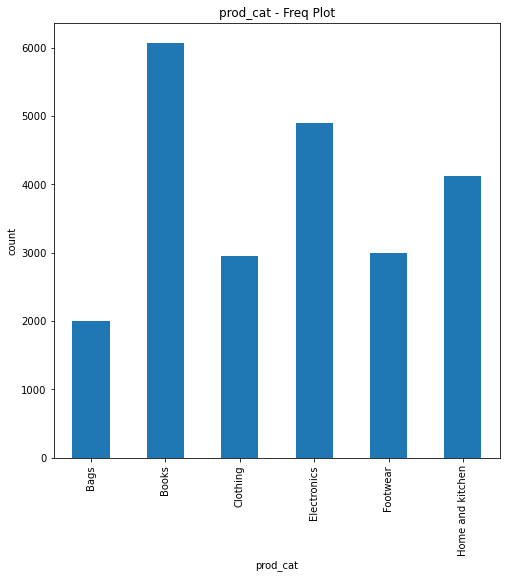

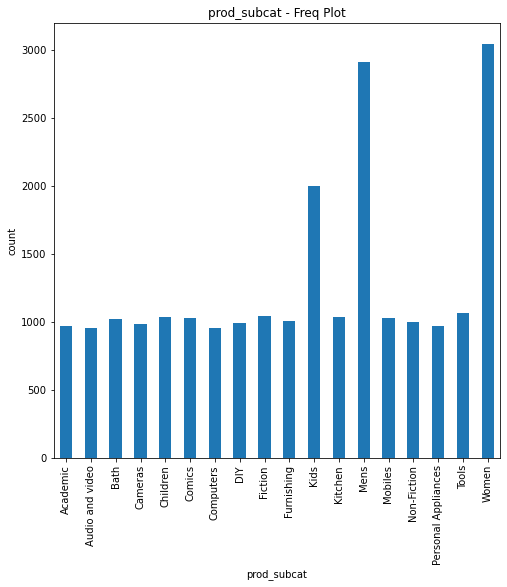

In [1000]:
print("Frequency plot for Categorical Variable")
for i in categ_var:
    freqbarplot(i)

### 4. Calculate the following information using the merged dataset :
##### a. Time period of the available transaction data

In [996]:
print("Transaction Period start date: ",pd.Timestamp.strftime(Customer_Final.tran_date.min(),format="%d-%b-%Y"),
     "\nTransaction Period end date: ", pd.Timestamp.strftime(Customer_Final.tran_date.max(),format="%d-%b-%Y"))
      

Transaction Period start date:  02-Jan-2011 
Transaction Period end date:  02-Dec-2014


##### b. Count of transactions where the total amount of transaction was negative

In [1036]:
Customer_Final[Customer_Final.total_amt<0].shape[0]

2163

 ### 5. Analyze which product categories are more popular among females vs male customers.

In [993]:
pd.crosstab(index= Customer_Final.Gender,columns=[Customer_Final.prod_cat])

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,993,2946,1439,2326,1528,1993
M,1003,3115,1518,2565,1467,2130


#### Ans: Books are popular for both male and female

 ### 6.Which City code has the maximum customers and what was the percentage of customers from that city?

In [991]:
City =pd.DataFrame( Customer_Final.groupby("city_code")['customer_Id'].count())
City.rename(columns = {"customer_Id":"Customer_count"},inplace=True)
City

,Customer_count
city_code,
1.0,2255
2.0,2263
3.0,2410
4.0,2422
5.0,2357
6.0,2123
7.0,2356
8.0,2328
9.0,2176


In [992]:
print("City code 4 has maximum number of customer with",City.max() )

City code 4 has maximum number of customer with Customer_count    2422
dtype: int64


In [906]:
Percentage = df.max()*100 / df.sum()
Percentage

Customer_count    10.519915
dtype: float64

## 7.Which store type sells the maximum products by value and by quantity?

In [989]:
df =Customer_Final.groupby("Store_type")["Rate","Qty"].sum().reset_index()
df[(df.Rate == df.Rate.max()) & (df.Qty == df.Qty.max())]


<ipython-input-989-962af90e57ef>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df =Customer_Final.groupby("Store_type")["Rate","Qty"].sum().reset_index()


,Store_type,Rate,Qty
3,e-Shop,5943931,22785


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [988]:
df= Customer_Final[Customer_Final["Store_type"] == 'Flagship store']
df.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Age
1,268408,1970-02-01,M,4.0,16197868036,2013-12-16,1,4,-5,-210,110.25,-1160.25,Flagship store,Bags,Mens,52
2,268408,1970-02-01,M,4.0,16197868036,2013-12-12,1,4,5,210,110.25,1160.25,Flagship store,Bags,Mens,52


In [986]:
round(df[df["prod_cat"].isin(["Clothing", "Electronics"])]['total_amt'].sum(),2)

3408936.05

### 9. What was the total amount earned from "Male" customers under the "Electronics" category?


In [983]:
Customer_Final.loc[(Customer_Final["Gender"]=="M" )& (Customer_Final['prod_cat']=='Electronics'),"total_amt"].sum()

5705871.925

### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [980]:
#Removing Negative Transaction

dft= Customer_Final[~(Customer_Final['total_amt']<0)]

dft[dft.total_amt <0]

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Age


In [981]:
#Considering unique Transaction ID

dft1 = dft.groupby(['customer_Id']).transaction_id.count().reset_index()
dft1[dft1.transaction_id>10].customer_Id.count()


6

6 customers have more than 10 transactions 

In [982]:
#Considering the product based transaction
trans = Customer_Final.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()
tf= trans.groupby("customer_Id").transaction_id.count()
tf[tf>9]


customer_Id
270908    10
272286    10
273014    10
274854    10
Name: transaction_id, dtype: int64

No customer has unique transaction more than 10

### 11. For all customers aged between 25 - 35, find out:

##### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [946]:
now =pd.Timestamp.now()
Customer_Final['Age'] = now.year-Customer_Final.DOB.dt.year


In [976]:
data_25_35 = Customer_Final[(Customer_Final.Age>=25 )& (Customer_Final.Age<=35)]


In [977]:
round(data_25_35.loc[data_25_35['prod_cat'].isin(['Electronics','Books']),'total_amt'].sum(),2)

6058458.64

##### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [978]:
from_date = pd.to_datetime("01Jan2014",format="%d%b%Y")
to_date = pd.to_datetime("1Mar2014",format="%d%b%Y")

data_25_35.loc[(data_25_35["tran_date"] >= from_date) & (data_25_35["tran_date"] <= to_date),'total_amt'].sum() 

428230.595